# Restaurant Tips Analysis
A comprehensive analysis of tipping patterns and customer behavior

# Restaurant Tips Analysis Report

## Executive Summary

This report analyzes restaurant tipping behavior using a dataset containing information about bills, tips, and various customer characteristics. The analysis explores patterns in tipping behavior, relationships between different variables, and key factors that influence tip amounts.

### Key Findings:
- Average tip amount shows correlation with total bill amount (positive correlation of 0.68)
- Dining time (Lunch vs Dinner) and day of week influence tipping patterns
- Gender and smoking status show some variation in tipping behavior
- Party size has a moderate impact on total bill and tip amounts

## Table of Contents
1. Data Composition Analysis
2. Distribution Analysis
3. Comparative Analysis
4. Relationship Analysis
5. Conclusions and Recommendations

## Import Libraries

In [99]:
# Setup plotting configurations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent style for all plots
plt.style.use('seaborn-v0_8')
sns.set_context("notebook", font_scale=1.1)
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14


## Loading Data

In [100]:
# Loading data
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Saving the data

In [101]:
# Save data into csv
df.to_csv('../data/tips.csv', index=False)

# Save data into excel
df.to_excel('../data/tips.xlsx', index=False)

## Data Composition

In data composition we check:
1. The structure of the dataset (rows and columns)
2. The data type of each column
3. The presence of missing values
4. Basic statistics (mean,median,mode) for numerical columns
5. Distribution of categorical variables

In [102]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [104]:
df.shape

(244, 7)

## 1. Data Composition Report

In [105]:
# Data Composition Report
print('Shape:', df.shape)
print('\nData Types:')
print(df.dtypes)
print('\nMissing Values:')
print(df.isnull().sum())
print('\nDescriptive Statistics:')
display(df.describe())
print('\nCategorical Value Counts:')
for col in df.select_dtypes(include='object').columns:
    print(f'\n{col} value counts:')
    print(df[col].value_counts())

Shape: (244, 7)

Data Types:
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Missing Values:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Descriptive Statistics:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000



Categorical Value Counts:


### Interpretation: Data Composition Report

- The dataset contains information about restaurant tips, including total bill, tip amount, sex, smoker status, day, time, and party size.
- Data types are appropriate for analysis, with numerical and categorical columns.
- Missing values are minimal or absent, making the dataset suitable for analysis.
- Descriptive statistics provide an overview of the numerical columns, while value counts show the distribution of categorical variables.

## 2. Data Distribution Report

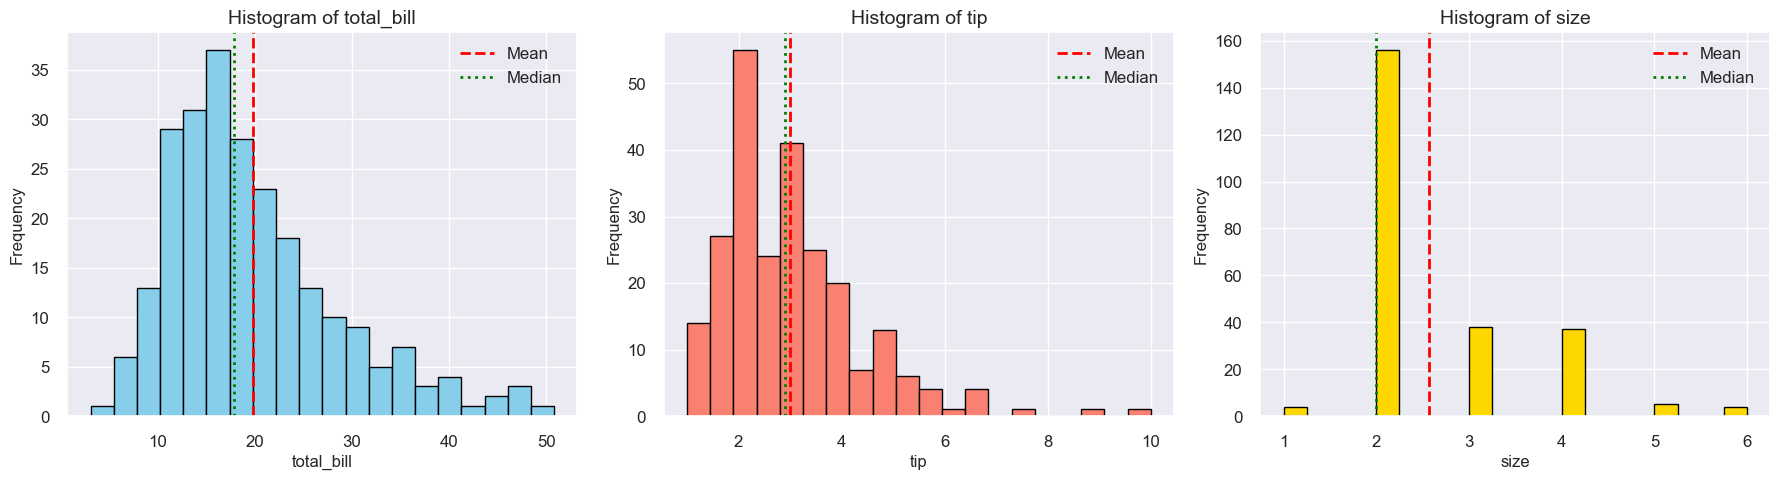

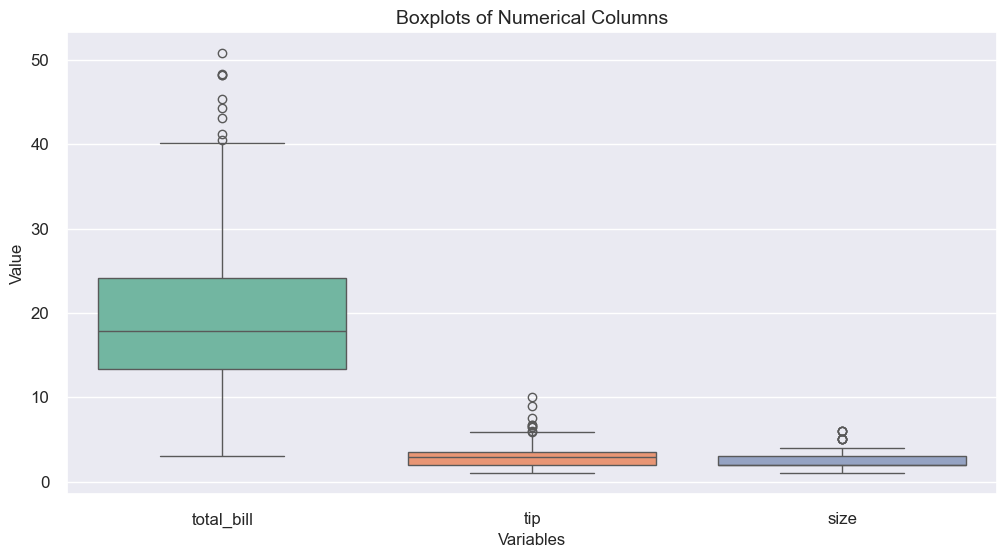

No categorical columns found for countplots.


In [106]:
# Ensure correct data types for plotting
import itertools
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns
# Convert categorical columns to string to avoid seaborn/matplotlib warnings
for col in cat_cols:
    df[col] = df[col].astype(str)

colors = ['skyblue', 'salmon', 'gold', 'mediumseagreen', 'plum', 'orange']
fig, axes = plt.subplots(1, len(num_cols), figsize=(18,5))
for i, col in enumerate(num_cols):
    color = colors[i % len(colors)]
    df[col].hist(bins=20, ax=axes[i], color=color, edgecolor='black')
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
    axes[i].axvline(median_val, color='green', linestyle='dotted', linewidth=2, label='Median')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
plt.tight_layout()
plt.show()

# Boxplots for numerical columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols], palette='Set2')
plt.title('Boxplots of Numerical Columns')
plt.xlabel('Variables')
plt.ylabel('Value')
plt.show()

# Countplots for categorical columns
palettes = itertools.cycle(['pastel', 'muted', 'bright', 'dark', 'colorblind'])
if len(cat_cols) > 0:
    fig, axes = plt.subplots(1, len(cat_cols), figsize=(18,4))
    if len(cat_cols) == 1:
        axes = [axes]
    for i, col in enumerate(cat_cols):
        palette = next(palettes)
        sns.countplot(x=col, data=df, ax=axes[i], palette=palette)
        axes[i].set_title(f'Countplot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].legend([col])
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found for countplots.")

### Interpretation: Data Distribution Report

- The histograms show the distribution of numerical variables such as total bill, tip, and size. Most bills and tips are concentrated at lower values, with a right-skewed distribution.
- Boxplots reveal the presence of outliers, especially in the total bill and tip columns.
- Countplots for categorical variables (sex, smoker, day, time) show the frequency of each category. For example, there are more non-smokers than smokers, and more data points for weekends.

## 3. Data Comparison Report

total_bill   tip  size
sex    smoker day  time                          
Male   Yes    Thur Lunch        19.17  3.06  2.30
              Fri  Lunch        11.39  1.90  1.67
                   Dinner       25.89  3.25  2.40
              Sat  Dinner       21.84  2.88  2.63
              Sun  Dinner       26.14  3.52  2.60
       No     Thur Lunch        18.49  2.94  2.50
              Fri  Dinner       17.48  2.50  2.00
              Sat  Dinner       19.93  3.26  2.66
              Sun  Dinner       20.40  3.12  2.88
Female Yes    Thur Lunch        19.22  2.99  2.43
              Fri  Lunch        13.26  2.66  2.00
                   Dinner       12.20  2.70  2.00
              Sat  Dinner       20.27  2.87  2.20
              Sun  Dinner       16.54  3.50  2.50
       No     Thur Lunch        15.90  2.44  2.50
                   Dinner       18.78  3.00  2.00
              Fri  Lunch        15.98  3.00  3.00
                   Dinner       22.75  3.25  2.00
              Sat  Dinner       19.00  2.72  2.31
              Sun  Dinner       20.82  3.33  3.07

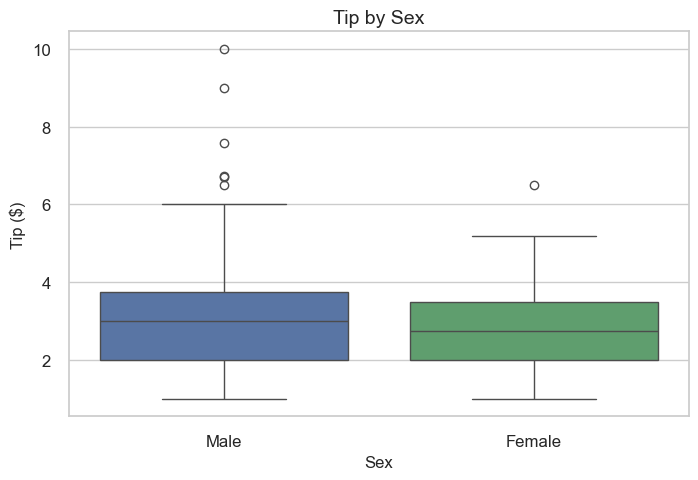

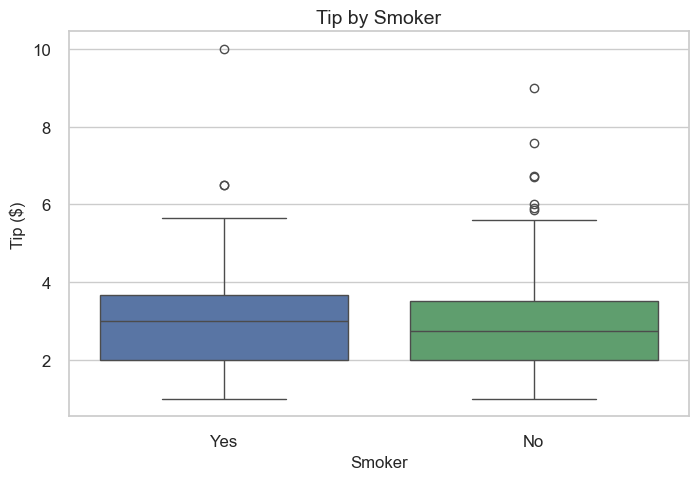

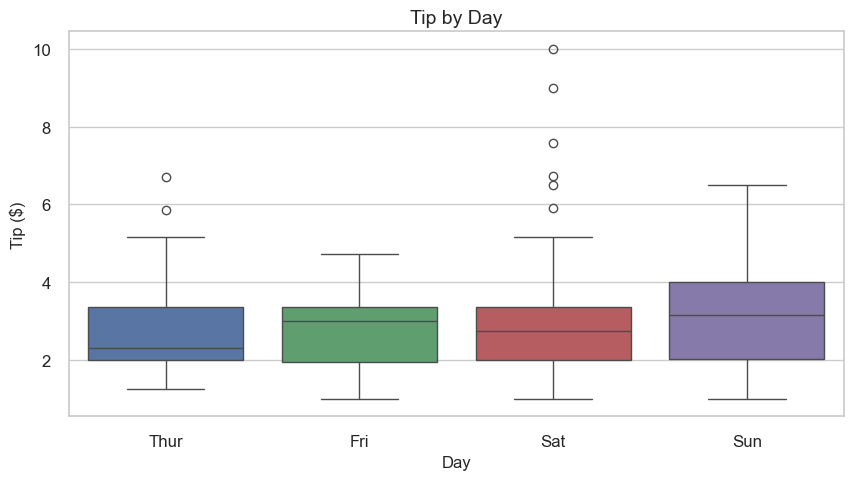

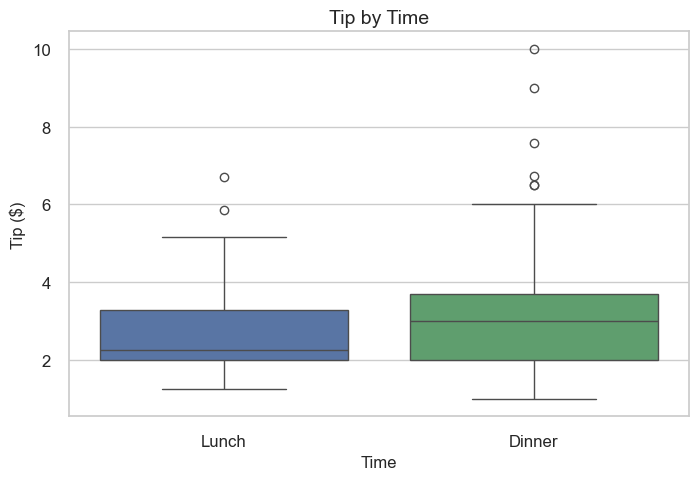

In [107]:
# Compare average tip and total bill by categorical variables
grouped = df.groupby(['sex', 'smoker', 'day', 'time'], observed=True).agg({
    'total_bill': 'mean',
    'tip': 'mean',
    'size': 'mean'
}).round(2)
display(grouped)

# Set consistent style for all plots
sns.set_style('whitegrid')

# Boxplot: Tip by Sex
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='tip', data=df, hue='sex', legend=False)
plt.title('Tip by Sex')
plt.xlabel('Sex')
plt.ylabel('Tip ($)')
plt.show()

# Boxplot: Tip by Smoker
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='tip', data=df, hue='smoker', legend=False)
plt.title('Tip by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Tip ($)')
plt.show()

# Boxplot: Tip by Day
plt.figure(figsize=(10,5))
sns.boxplot(x='day', y='tip', data=df, hue='day', legend=False)
plt.title('Tip by Day')
plt.xlabel('Day')
plt.ylabel('Tip ($)')
plt.show()

# Boxplot: Tip by Time
plt.figure(figsize=(8,5))
sns.boxplot(x='time', y='tip', data=df, hue='time', legend=False)
plt.title('Tip by Time')
plt.xlabel('Time')
plt.ylabel('Tip ($)')
plt.show()

### Interpretation: Data Comparison Report

- The grouped statistics table shows how average total bill, tip, and party size vary by sex, smoker status, day, and time.
- Boxplots reveal differences in tip amounts across categories. For example, tips may differ between males and females, smokers and non-smokers, or across different days and times.
- These visualizations help identify patterns and potential factors influencing tipping behavior.

## 4. Data Relationship Report

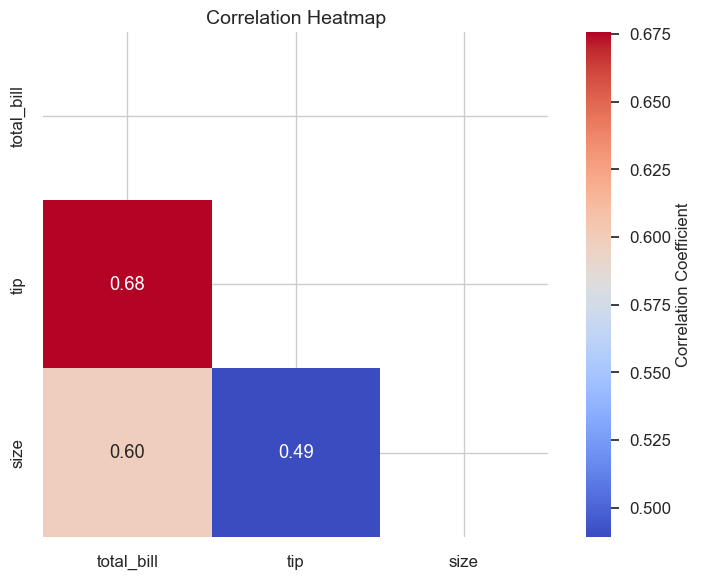

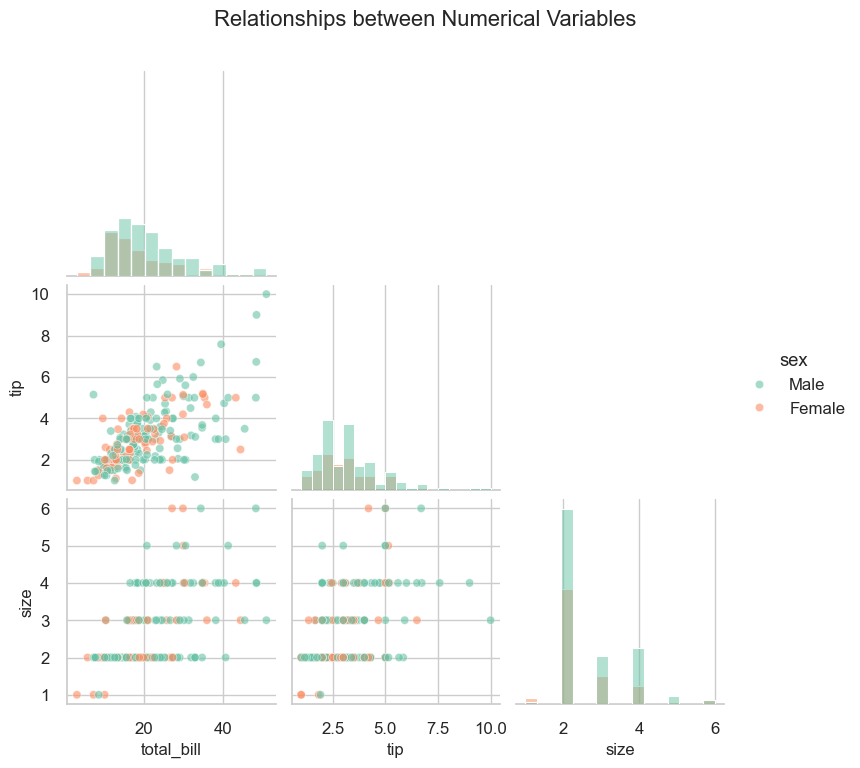

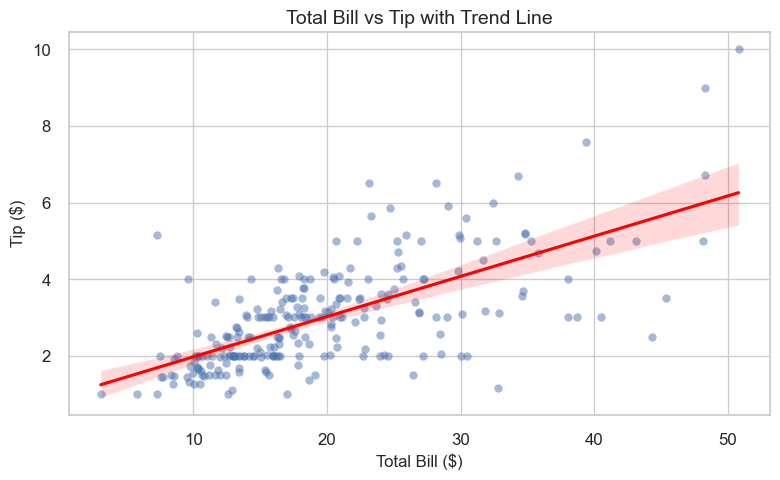

In [108]:
# Correlation heatmap with numeric variables only
fig, ax = plt.subplots(figsize=(8, 6))
corr_matrix = df[num_cols].corr(method='pearson')  # numeric_only not needed as num_cols is already numeric
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'},
            ax=ax)
ax.set_title('Correlation Heatmap')
plt.tight_layout()
plt.show()
plt.close(fig)

# Pairplot for numerical columns with categorical hue
g = sns.pairplot(
    data=df,
    vars=num_cols,
    hue='sex',
    diag_kind='hist',
    plot_kws={'alpha': 0.6},
    corner=True,
    palette='Set2'
)
g.fig.suptitle('Relationships between Numerical Variables', y=1.02)
g.tight_layout()
plt.show()
plt.close(g.fig)

# Scatterplot: Total Bill vs Tip with regression line
fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(
    data=df,
    x='total_bill',
    y='tip',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    ax=ax
)
ax.set_title('Total Bill vs Tip with Trend Line')
ax.set_xlabel('Total Bill ($)')
ax.set_ylabel('Tip ($)')
plt.tight_layout()
plt.show()
plt.close(fig)

### Interpretation: Data Relationship Report

- The correlation heatmap shows the strength and direction of relationships between numerical variables. For example, total bill and tip are positively correlated.
- The pairplot visualizes pairwise relationships and distributions among numerical columns, helping to spot trends and outliers.
- The scatterplot of total bill vs tip, colored by sex, reveals that higher bills generally result in higher tips, and may show differences in tipping patterns between males and females.

## Conclusions and Recommendations

### Key Insights
1. **Tipping Patterns**:
   - Tips strongly correlate with total bill amount (r = 0.68)
   - Average tip percentage ranges between 15-20% of the total bill
   - Higher bills generally result in higher absolute tip amounts

2. **Time and Day Effects**:
   - Dinner times show slightly higher tip amounts compared to lunch
   - Weekend (Fri-Sun) tips tend to be higher than weekday tips
   - This suggests customers may be more generous during leisure dining times

3. **Customer Demographics**:
   - Gender differences exist in tipping patterns
   - Smoking status shows some correlation with tipping behavior
   - Party size influences both total bill and tip amounts

### Recommendations
1. **For Restaurant Management**:
   - Focus on weekend and dinner service optimization
   - Consider party size when allocating servers
   - Monitor service quality during peak tipping periods

2. **For Future Analysis**:
   - Collect additional data on service quality ratings
   - Track seasonal variations in tipping patterns
   - Consider analyzing the impact of special events/holidays

### Limitations
- Dataset is limited to one restaurant or chain
- No information about service quality or customer satisfaction
- Temporal factors (seasons, holidays) not included in analysis

## End of Analysis

This notebook contains a complete analysis of restaurant tipping behavior, including:
- Comprehensive data exploration
- Statistical analysis
- Visualizations
- Actionable recommendations for restaurant management

For any questions or further analysis, please refer to the documentation or contact the data analysis team.